# Data Preparation

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import folium

In [78]:
data = pd.read_csv('london_crime.csv')

In [79]:
data.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0.0,2016.0,11.0
1,E01001646,Greenwich,Violence Against the Person,Other violence,0.0,2016.0,11.0
2,E01000677,Bromley,Violence Against the Person,Other violence,0.0,2015.0,5.0
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0.0,2016.0,3.0
4,E01004563,Wandsworth,Robbery,Personal Property,0.0,2008.0,6.0


In [80]:
data.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
11722554,E01001254,Ealing,Theft and Handling,Other Theft,0.0,2015.0,12.0
11722555,E01001471,Enfield,Criminal Damage,Criminal Damage To Dwelling,0.0,2010.0,8.0
11722556,E01002477,Hillingdon,Theft and Handling,Other Theft,0.0,2009.0,11.0
11722557,E01004321,Tower Hamlets,Theft and Handling,Theft From Shops,0.0,2015.0,11.0
11722558,E010018,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
#Melihat list header kolom
data.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

# Preprocessing

In [82]:
#Mengisi nilai yang hilang dengan mean
data['value'].fillna(data['value'].mean(), inplace=True)

# What is the change in the number of crime incidents from 2011 to 2016?

In [83]:
# Filter data untuk tahun 2011 dan 2016
data_2011 = data[data['year'] == 2011]
data_2012 = data[data['year'] == 2012]
data_2013 = data[data['year'] == 2013]
data_2014 = data[data['year'] == 2014]
data_2015 = data[data['year'] == 2015]
data_2016 = data[data['year'] == 2016]

# menghitung jumlah kejadian kriminalitas untuk tahun 2011 dan 2016
jumlah_kejadian_2011 = data_2011['value'].sum()
jumlah_kejadian_2012 = data_2012['value'].sum()
jumlah_kejadian_2013 = data_2013['value'].sum()
jumlah_kejadian_2014 = data_2014['value'].sum()
jumlah_kejadian_2015 = data_2015['value'].sum()
jumlah_kejadian_2016 = data_2016['value'].sum()

In [84]:
perubahan_kejadian = jumlah_kejadian_2016 + jumlah_kejadian_2015 + jumlah_kejadian_2014 + jumlah_kejadian_2013 + jumlah_kejadian_2012 + jumlah_kejadian_2011
print(f"Perubahan jumlah kejadian kriminalitas dari 2011 ke 2016 adalah: {perubahan_kejadian}")

Perubahan jumlah kejadian kriminalitas dari 2011 ke 2016 adalah: 3712317.0


Jumlah kejadian kriminalitas dari tahun 2011 ke 2016 adalah sebanyak 48423

# What were the top 3 crimes per borough in 2016?

In [85]:
# melakukan filter untuk tahun 2016
data_2016 = data[data['year'] == 2016]

# Untuk membuat top Borough dan minor category
top_crimes_2016 = data_2016.groupby(['borough', 'minor_category'])['value'].sum().reset_index()

# membuat 3 kejahatan teratas per wilayah
top_crimes_2016 = top_crimes_2016.sort_values(by='value', ascending=False).groupby('borough').head(3)

print(top_crimes_2016)

                   borough            minor_category    value
1035           Westminster               Other Theft  10722.0
1036           Westminster        Other Theft Person   5393.0
181                 Camden               Other Theft   4954.0
875              Southwark               Other Theft   4238.0
683                Lambeth               Other Theft   4100.0
...                    ...                       ...      ...
849   Richmond upon Thames  Theft From Motor Vehicle    879.0
890                 Sutton            Common Assault    871.0
205         City of London        Other Theft Person     48.0
204         City of London               Other Theft     48.0
208         City of London       Possession Of Drugs      9.0

[99 rows x 3 columns]


Disimpulkan bahwa top 3 kejahatan berdasarkan borough terdapat wilayah Westminster,camden dan southwark

# Visualisasi Data

## Area Port

In [86]:
# Membuat filter data untuk tahun 2015
data_2015 = data[data['year'] == 2015]

In [87]:
#Menghitung jumlah kejahatan dari per area
kejahatan_per_area = data_2015.groupby('borough')['value'].sum().reset_index()

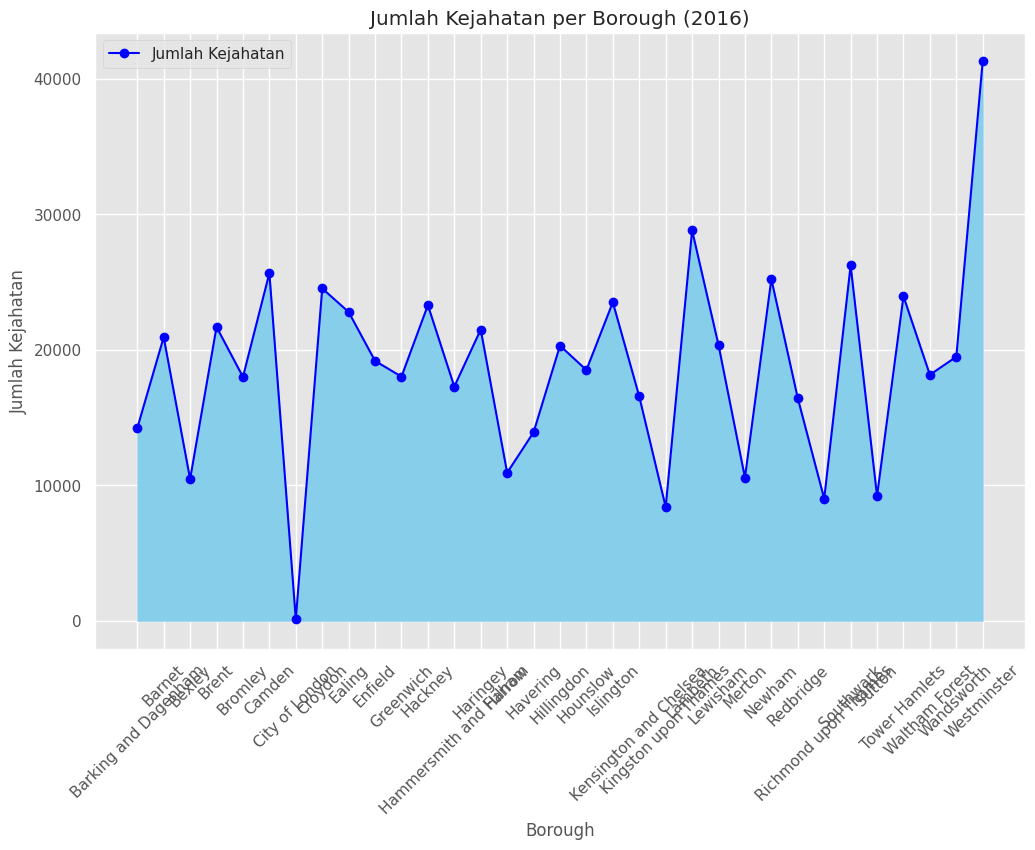

In [88]:
plt.figure(figsize=(12, 8))
plt.style.use('ggplot')

# Buat Area Plot
plt.fill_between(kejahatan_per_area['borough'], kejahatan_per_area['value'], color='skyblue')
plt.plot(kejahatan_per_area['borough'], kejahatan_per_area['value'], marker='o', color='blue', label='Jumlah Kejahatan')
plt.xlabel('Borough')
plt.ylabel('Jumlah Kejahatan')
plt.title('Jumlah Kejahatan per Borough (2016)')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

kesimpulan di atas bahwa jumlah kejahatan pada tahun 2016 terkecil terdapat pada kota city of london dan tertinggi terdapat pada westminster

## Histogram

In [89]:
#melihat data borough
data['borough'].head()

0       Croydon
1     Greenwich
2       Bromley
3     Redbridge
4    Wandsworth
Name: borough, dtype: object

In [90]:
data_greenwich_2011 = data[(data['borough'] == 'Greenwich') & (data['year'] == 2011)]

kodingan di atas bertujuan untuk membuat melihat tingkat kejahatan dari kota greenwich pada tahun 2011

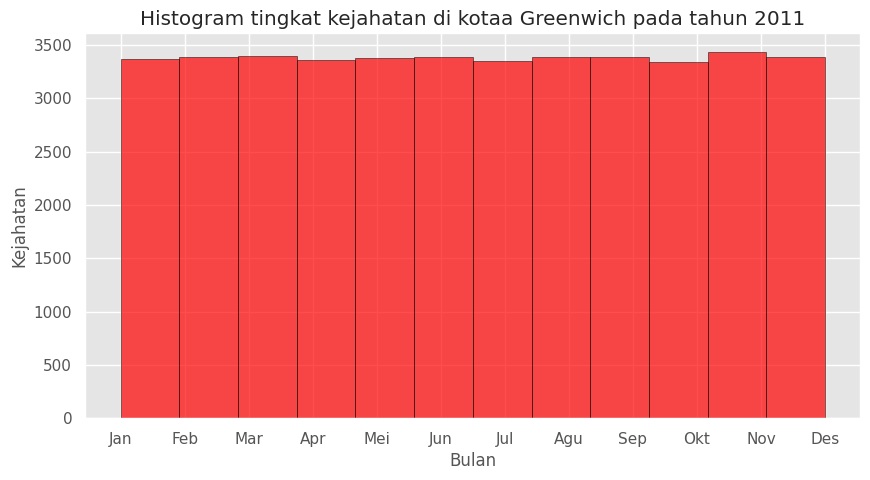

In [91]:
#membuat histogram
plt.figure(figsize=(10,5))
plt.style.use('ggplot')

plt.hist(data_greenwich_2011['month'], bins= 12,edgecolor='black',
         alpha=0.7,color='red')
plt.xlabel('Bulan')
plt.ylabel('Kejahatan')
plt.title('Histogram tingkat kejahatan di kotaa Greenwich pada tahun 2011')
bulan_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des']
plt.xticks(range(1, 13), bulan_labels)
plt.show()

Penjelasan dari histogram di atas dinyatakan bahwa tingkat kejahatan pada kota greenwich sangat lah besar

## Bar Chart

In [92]:
kejahatan_pertahun = data.groupby('year')['value'].sum().reset_index()

Untuk mencari tingkat kejahatan berdasarkan pertahun

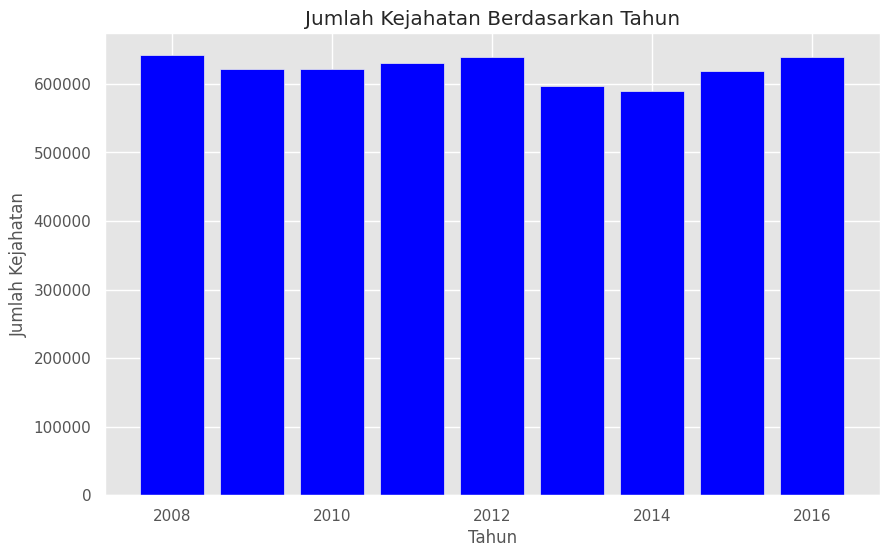

In [93]:
plt.figure(figsize=(10, 6))

plt.bar(kejahatan_pertahun['year'], kejahatan_pertahun['value'], color='blue')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')
plt.title('Jumlah Kejahatan Berdasarkan Tahun')
plt.show()

dari kesimpulan di atas tingkat kejahatan memang sudah besar sejak tahun 2008

# Pie Chart

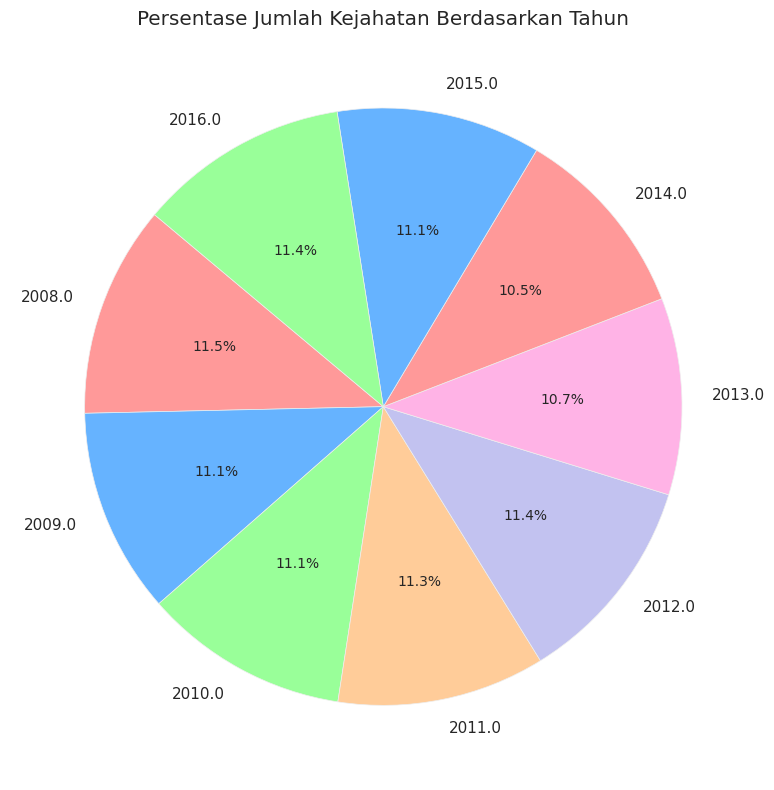

In [103]:
plt.figure(figsize=(8, 8))

# Buat Pie Chart
plt.pie(kejahatan_pertahun['value'], labels=kejahatan_pertahun['year'],
        autopct='%1.1f%%',
        startangle=140,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])
plt.title('Persentase Jumlah Kejahatan Berdasarkan Tahun')
plt.tight_layout()
plt.show()

jika menggunakan pie chart kita dapat melihat persentase tingkat kejahatan berdasarkan tahun ke tahun

## Box Plot

In [123]:
data_2010 = data[data['year'] == 2010]
major_category_counts = data_2010['major_category'].value_counts()

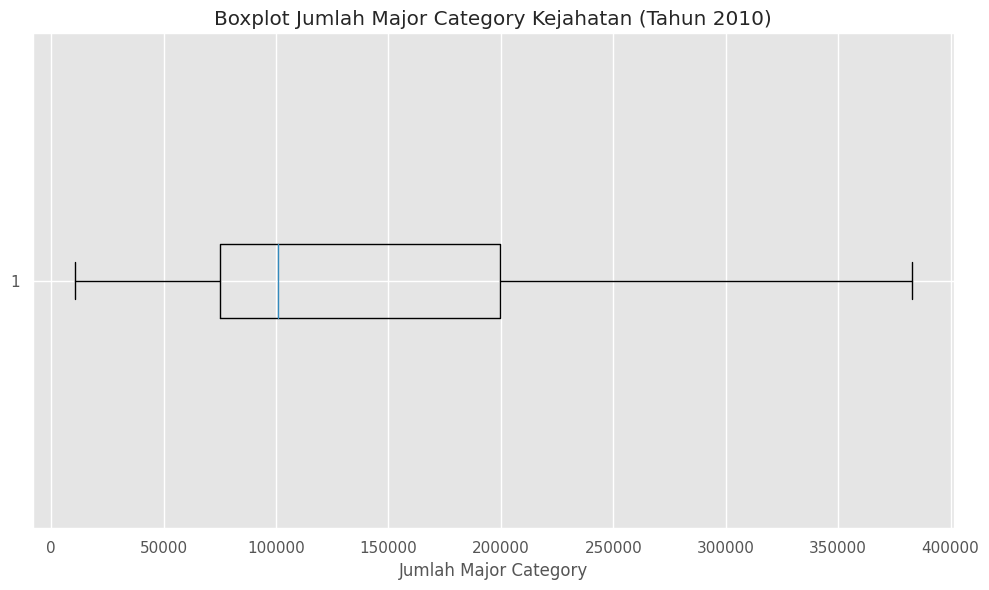

In [124]:
plt.figure(figsize=(10, 6))
plt.boxplot(major_category_counts.values, vert=False)
plt.xlabel('Jumlah Major Category')
plt.title('Boxplot Jumlah Major Category Kejahatan (Tahun 2010)')
plt.tight_layout()
plt.show()

codingan di atas untuk menampilkan jumlah major category kejahatan berdasarkan tahun

## Scatter Plot

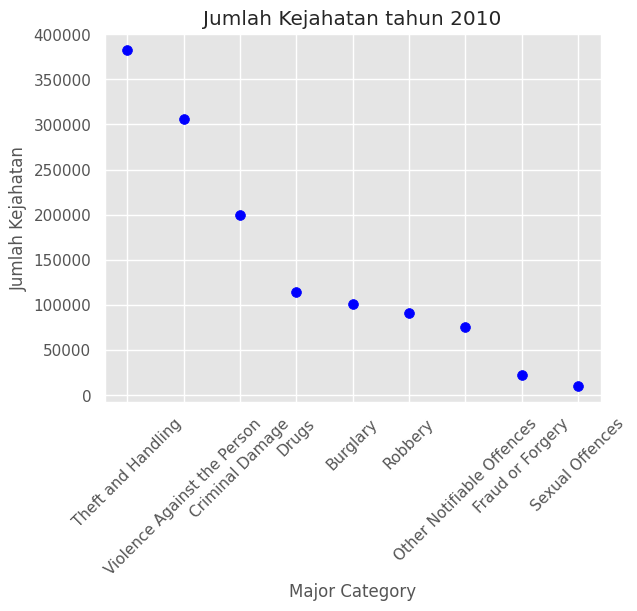

In [125]:
plt.scatter(major_category_counts.index, major_category_counts.values,
            color='blue',s=50)
plt.xlabel('Major Category')
plt.ylabel('Jumlah Kejahatan')
plt.title('Jumlah Kejahatan tahun 2010')
plt.xticks(rotation=45)
plt.show()

disini menampilan tipe kejahatan juga menampilkan tinggi kejahatan hingga kecilnya kejahatan dari kategory major di tahun 2010

## Word Clouds

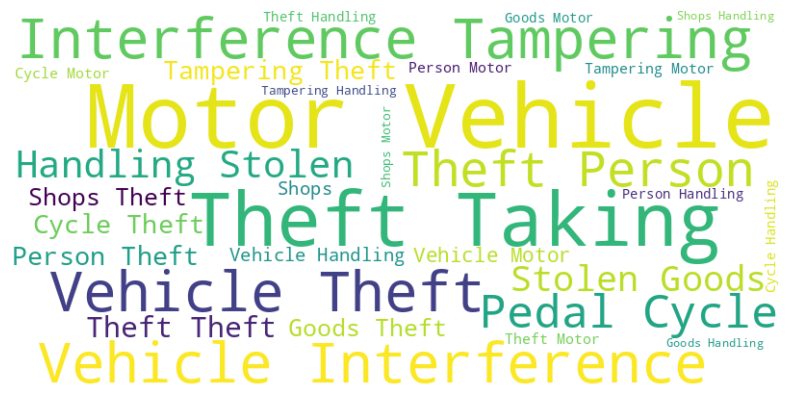

In [130]:
# Melakukan frekuensi tipe kejahatan dan melakukan filter
kategori_mayor = data['major_category']
frekuensi_kejahatan = kategori_mayor.value_counts()
kejahatan_terbanyak = frekuensi_kejahatan.idxmax()
data_terbanyak = data[data['major_category'] == kejahatan_terbanyak]
# Gabungkan tipe kejahatan dari kategori minor
tipe_kejahatan_terbanyak = ' '.join(data_terbanyak['minor_category'])

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tipe_kejahatan_terbanyak)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

kodingan di atas memiliki fungsi untuk menampilkan kejahatan yang dimana ia akan memperbesar huruf dari tipe kejahatan karena wordcloud akan memperbesar huruf dari angka paling banyak

# Folium Maps

In [160]:
Latitude =  51.509865
Longitude = -0.118092

In [162]:
london_map = folium.Map(location=[51.509865, -0.118092], zoom_start=12)
london_map

In [164]:
london_map = folium.Map(location=[51.509865, -0.118092], zoom_start=12)

In [165]:
total_kejahatan = len(data)

In [166]:
folium.Marker(
    location=[51.509865, -0.118092],
    icon=None,
    popup=f'Jumlah Kejahatan: {total_kejahatan}',
    tooltip='Klik untuk info'
).add_to(london_map)


In [167]:
london_map

kodingan diatas akan menampilkan tempat kejahatan atau tindakan criminalitas paling banyak